<a href="https://colab.research.google.com/github/Leesungsoo5238/Fire-detecting/blob/main/YOLOv8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Aug  7 04:49:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/YOLOv8

/content/drive/MyDrive/YOLOv8


In [ ]:
!ls

data  data.yaml  runs  yolov8s.pt


In [ ]:
%cd /content/drive/MyDrive/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=10 imgsz=640 plots=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [ ]:
!ls runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1691067183.e15c0459d37d.2947.0  train_batch2.jpg
F1_curve.png					    train_batch650.jpg
P_curve.png					    train_batch651.jpg
PR_curve.png					    train_batch652.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


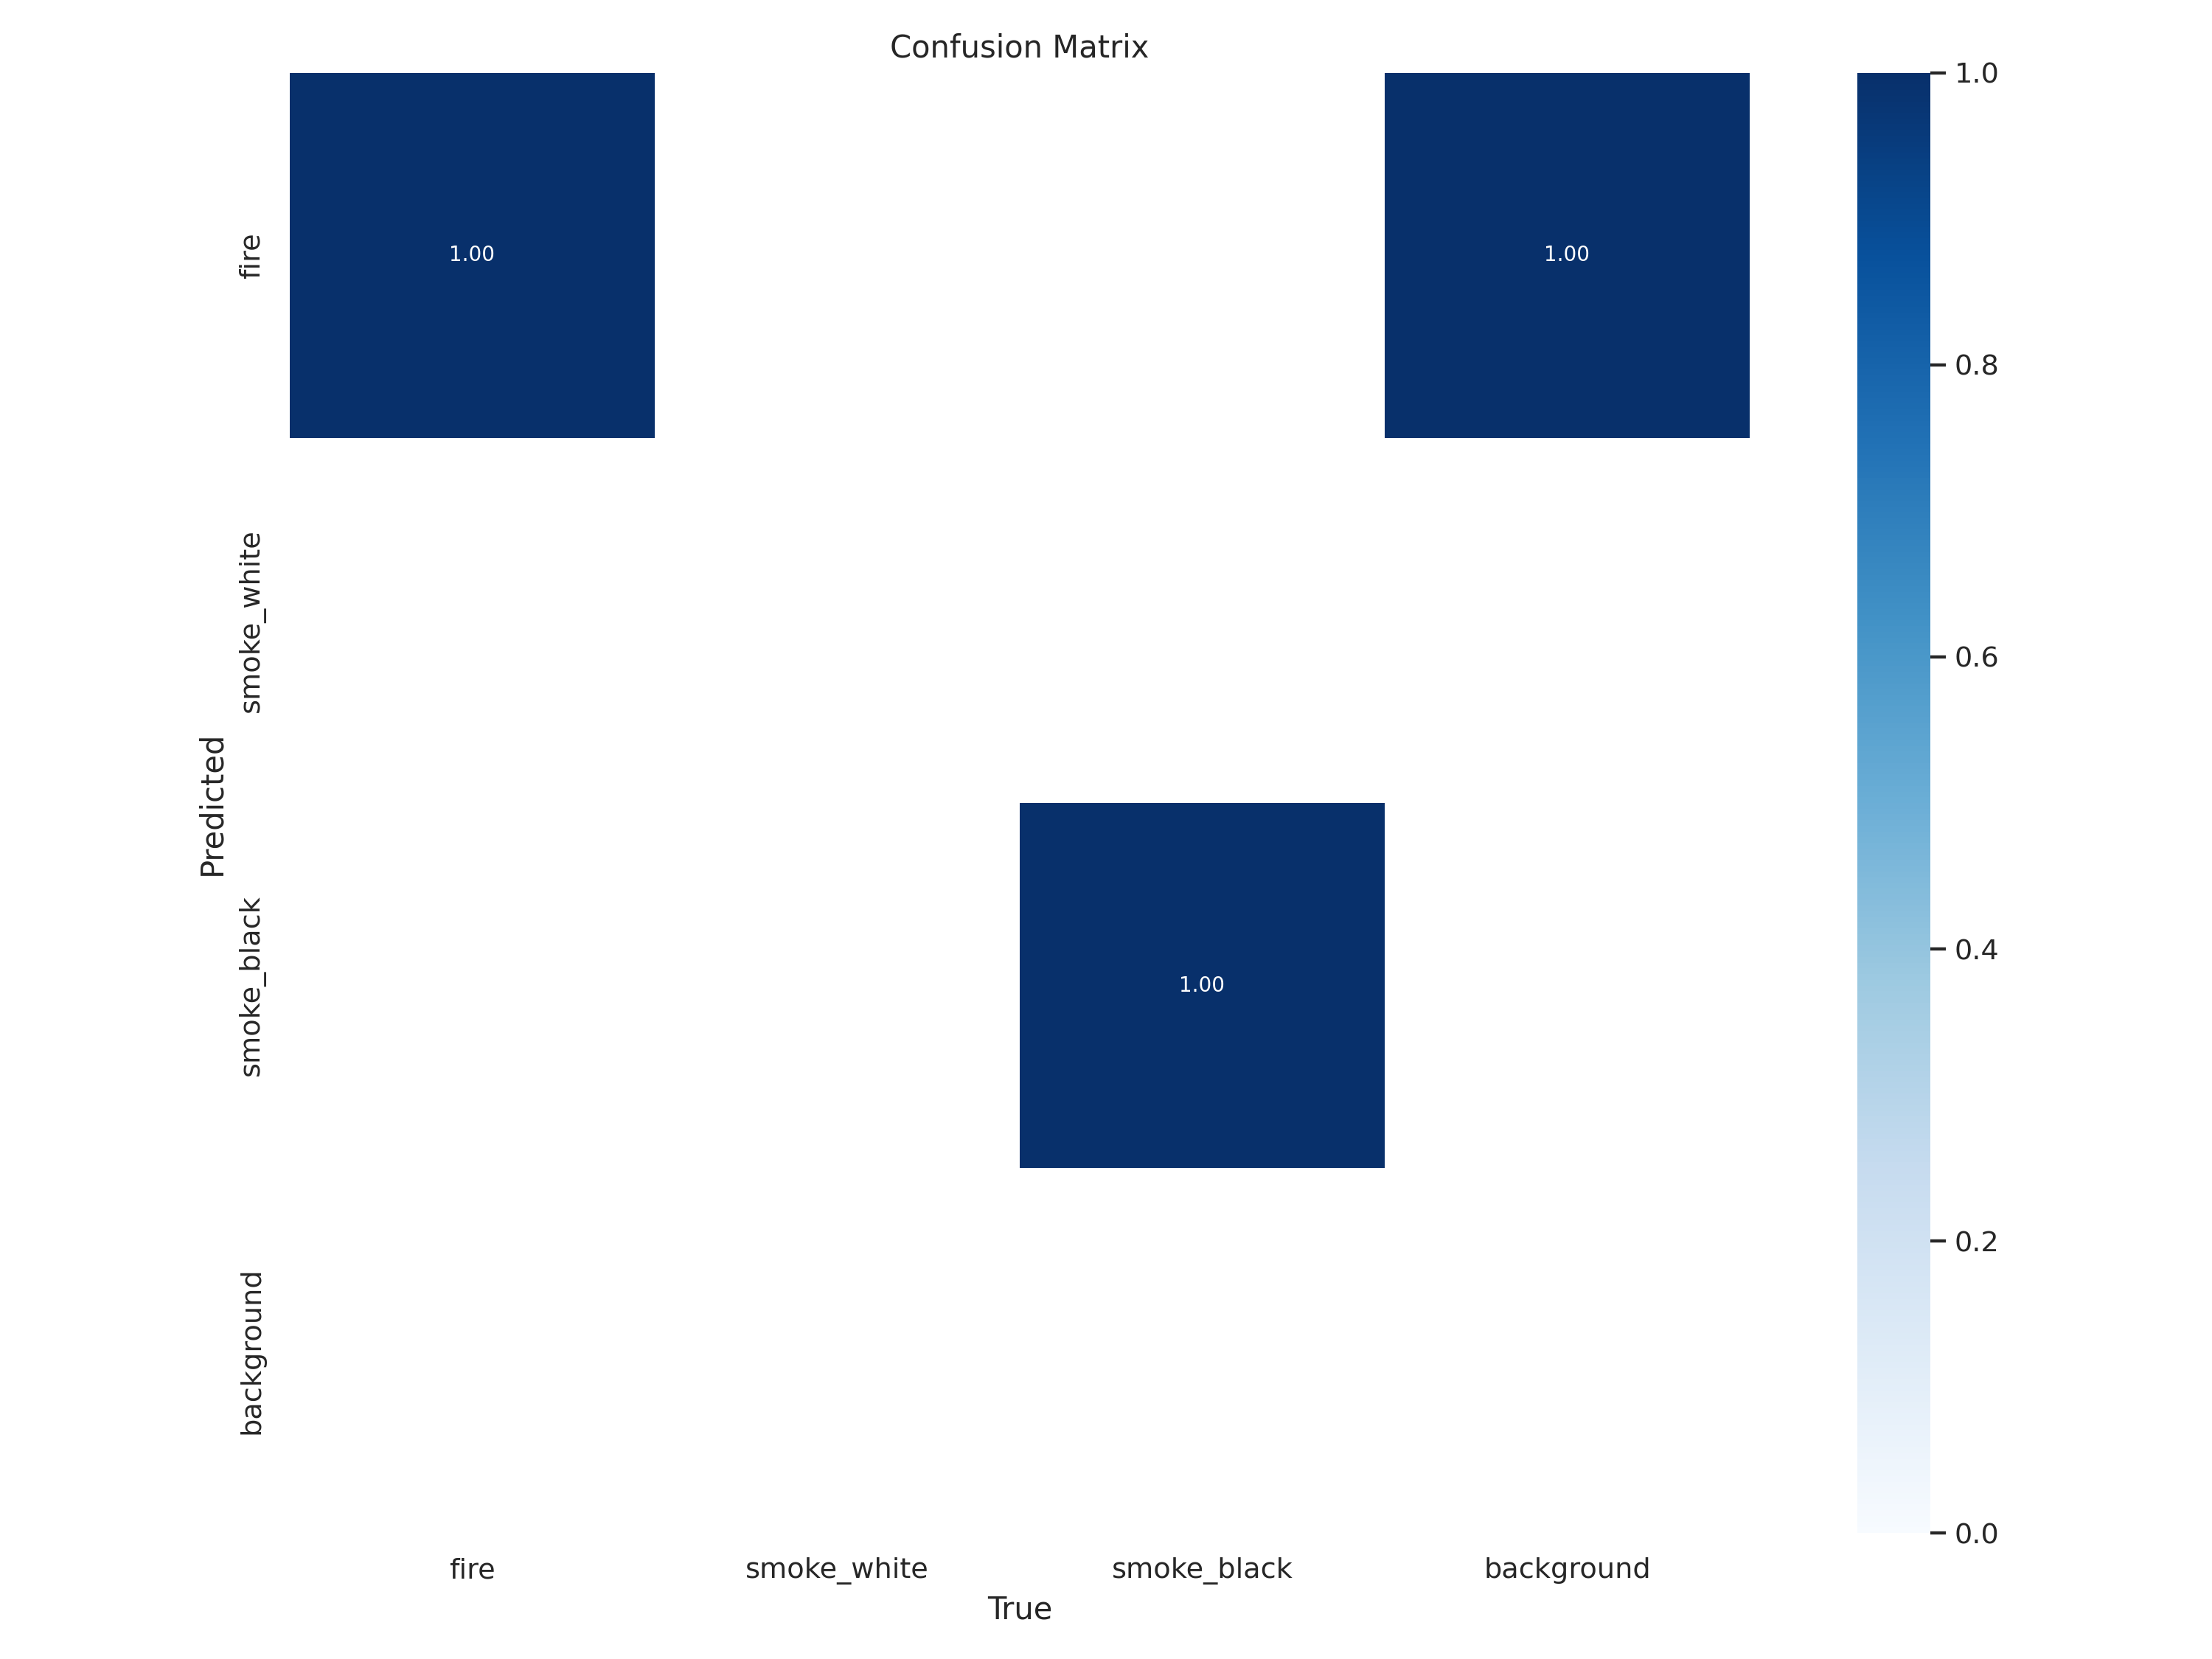

In [ ]:
Image(filename= 'runs/detect/train/confusion_matrix.png', width=600)

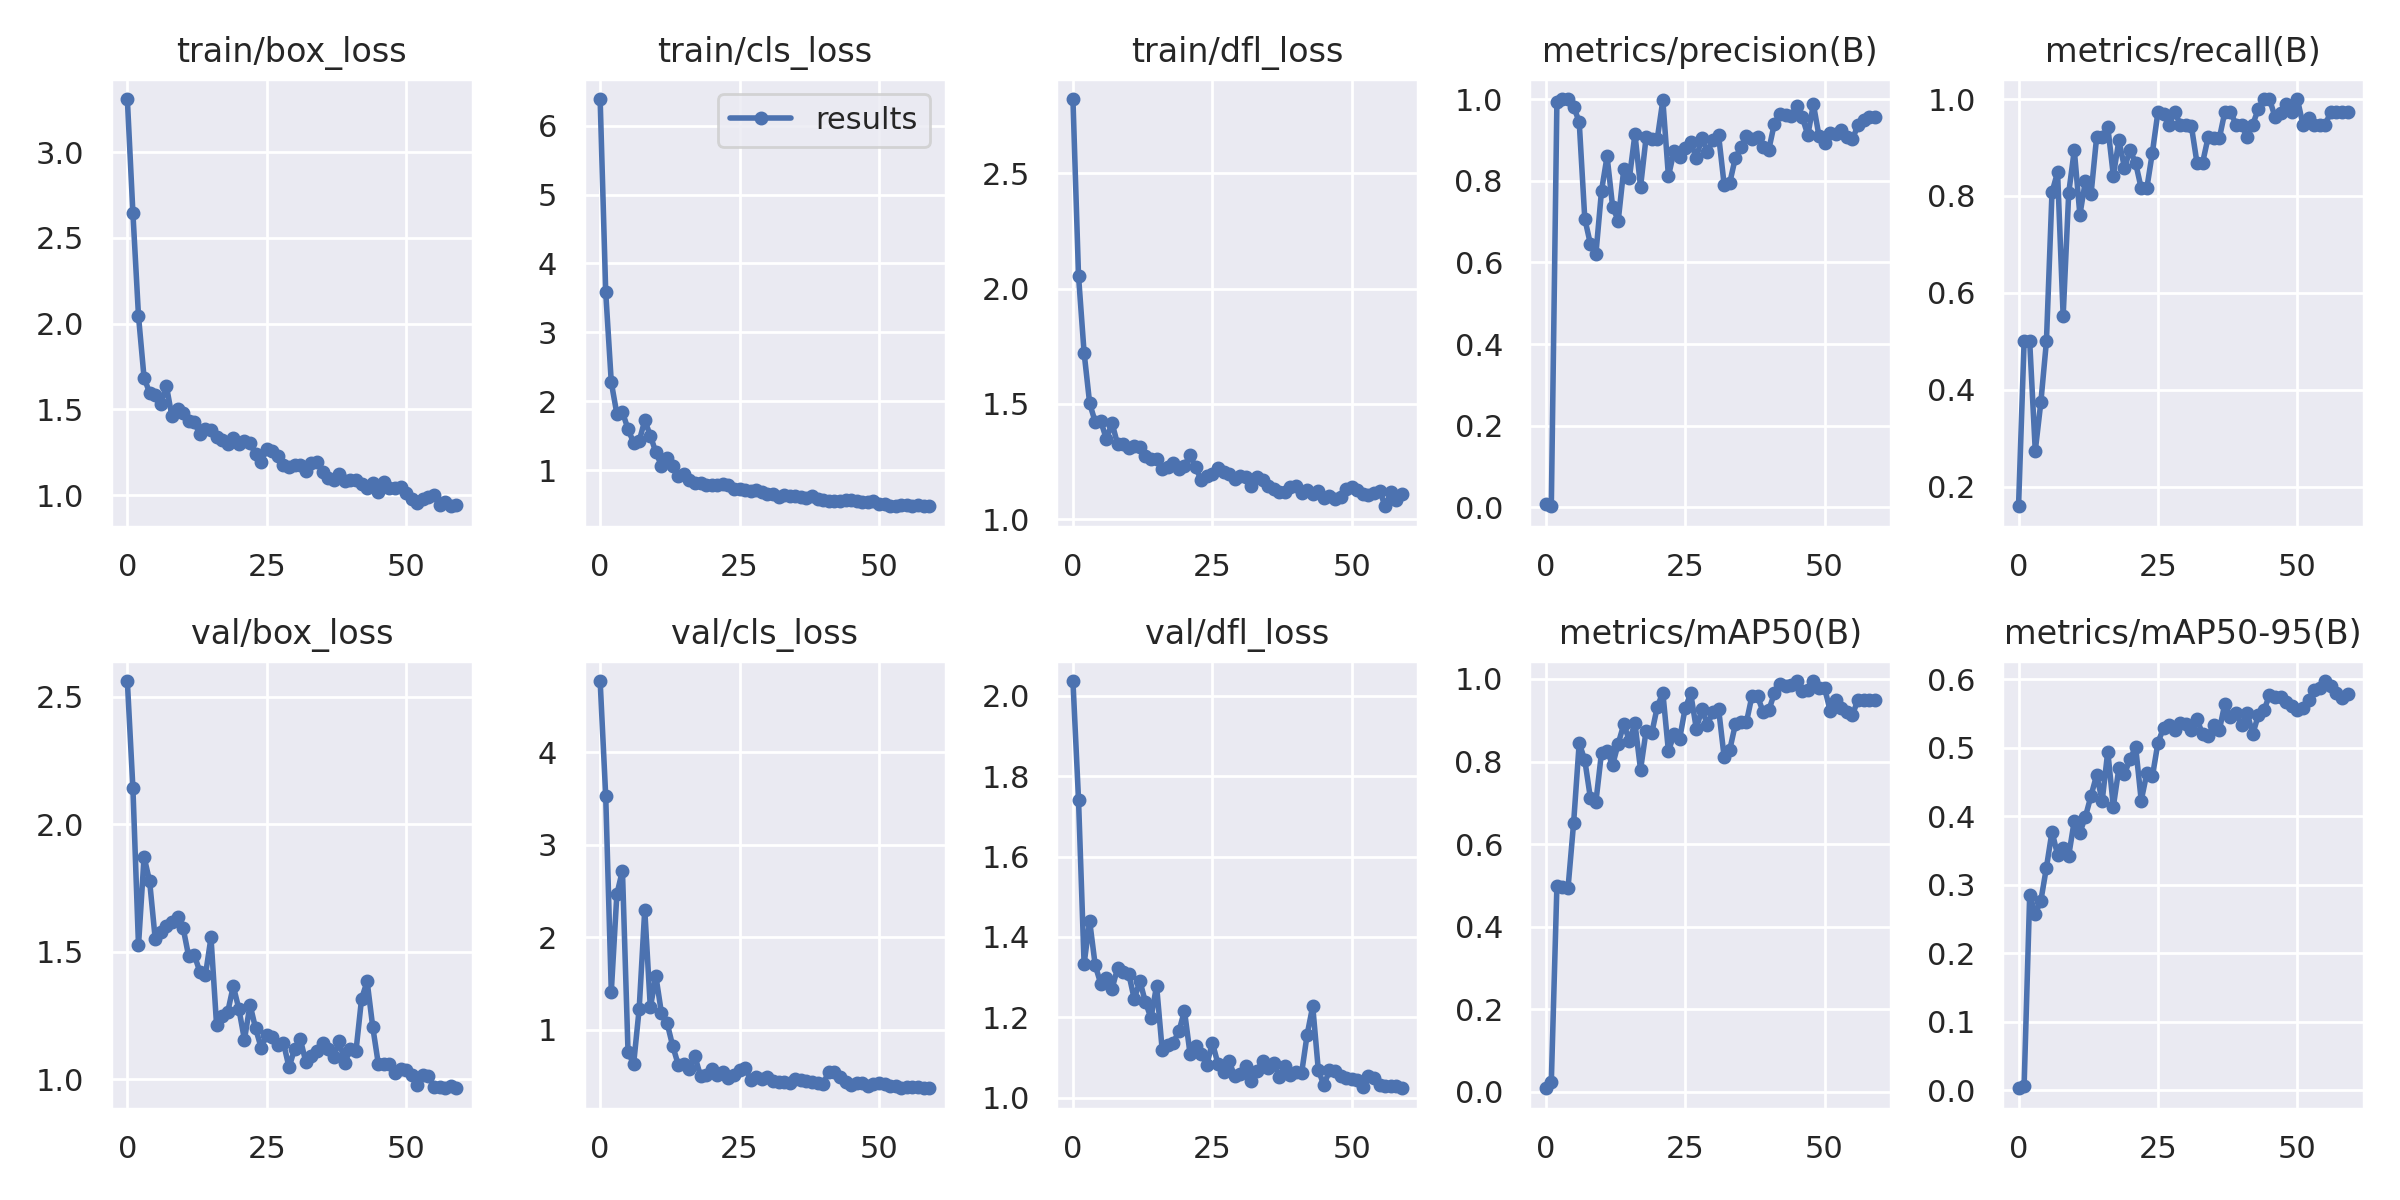

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

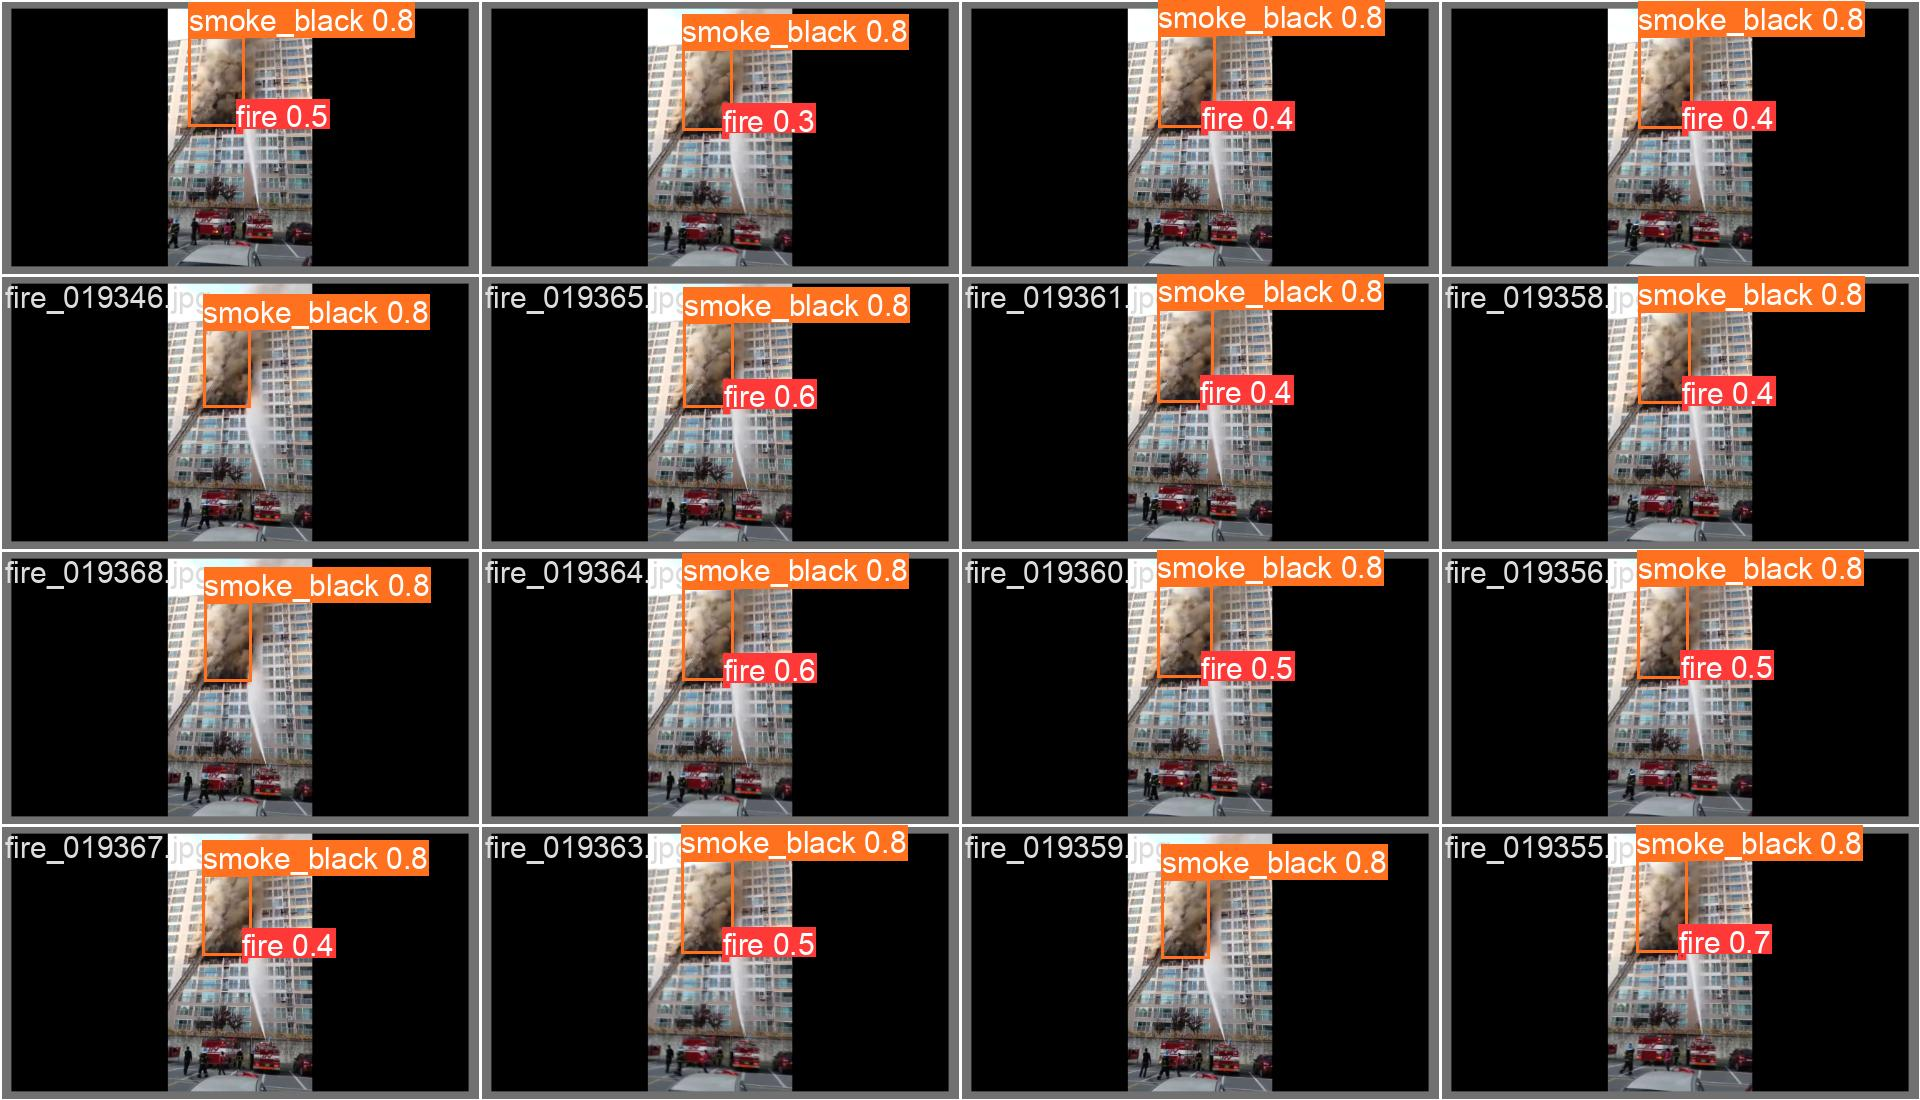

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2023-08-03 14:20:50.659148: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 14:20:51.619596: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv8/data/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:05<00:00,  2.69s/it]
                   all         25         44      0.902      0.947      0.914      0.588
                  fire         25         19   

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

2023-08-03 14:23:55.642084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 14:23:56.546846: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/25 /content/drive/MyDrive/YOLOv8/data/test/images/fire_019346.jpg: 384x640 1 fire, 1 smoke_black, 84.3ms
image 2/25 /content/drive/MyDrive/YOLOv8/data/test/images/fire_019347.jpg: 384x640 1 fire, 1 smoke_black, 11.1ms
image 3/25 /content/drive/MyDrive/YOLOv8/data/test/images/fire_019348.jpg: 384x640 1 fire, 1 smoke_black, 11.1ms
image 4/25 /content/drive/MyDrive/YOLOv8/data/test/images